***Problem Statement***: One of the challenge for all Pharmaceutical companies is to understand the persistency of drug as per the physician prescription. To solve this problem ABC pharma company approached an analytics company to automate this process of identification.

***ML Problem***: With an objective to gather insights on the factors that are impacting the persistency, build a classification for the given dataset.

***Target Variable***: `persistency_flag`  

***Task***:

- Problem understanding   
- Data Understanding  
- Data Cleaning and Feature engineering  
- Model Development  
- Model Selection  
- Model Evaluation  
- Report the accuracy, precision and recall of both the class of target variable  
- Report ROC-AUC as well  
- Deploy the model  
- Explain the challenges and model selection  

## Feature Description

| Bucket                   | Variable                            | Variable Description                                                                                                                                                                                                                                                                         |
|--------------------------|-------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Unique Row Id            | Patient ID                          | Unique ID of each patient                                                                                                                                                                                                                                                                    |
| Target Variable          | Persistency_Flag                    | Flag indicating if a patient was persistent or not                                                                                                                                                                                                                                           |
| Demographics             | Age                                 | Age of the patient during their therapy                                                                                                                                                                                                                                                      |
|                          | Race                                | Race of the patient from the patient table                                                                                                                                                                                                                                                   |
|                          | Region                              | Region of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | Ethnicity                           | Ethnicity of the patient from the patient table                                                                                                                                                                                                                                              |
|                          | Gender                              | Gender of the patient from the patient table                                                                                                                                                                                                                                                 |
|                          | IDN Indicator                       | Flag indicating patients mapped to IDN                                                                                                                                                                                                                                                       |
| Provider Attributes      | NTM - Physician Specialty           | Specialty of the HCP that prescribed the NTM Rx                                                                                                                                                                                                                                              |
| Clinical Factors         | NTM - T-Score                       | T Score of the patient at the time of the NTM Rx (within 2 years prior from rxdate)                                                                                                                                                                                                          |
|                          | Change in T Score                   | Change in Tscore before starting with any therapy and after receiving therapy  (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                                  |
|                          | NTM - Risk Segment                  | Risk Segment of the patient at the time of the NTM Rx (within 2 years days prior from rxdate)                                                                                                                                                                                                |
|                          | Change in Risk Segment              | Change in Risk Segment before starting with any therapy and after receiving therapy (Worsened, Remained Same, Improved, Unknown)                                                                                                                                                             |
|                          | NTM - Multiple Risk Factors         | Flag indicating if  patient falls under multiple risk category (having more than 1 risk) at the time of the NTM Rx (within 365 days prior from rxdate)                                                                                                                                       |
|                          | NTM - Dexa Scan Frequency           | Number of DEXA scans taken prior to the first NTM Rx date (within 365 days prior from rxdate)                                                                                                                                                                                                |
|                          | NTM - Dexa Scan Recency             | Flag indicating the presence of Dexa Scan before the NTM Rx (within 2 years prior from rxdate or between their first Rx and Switched Rx; whichever is smaller and applicable)                                                                                                                |
|                          | Dexa During Therapy                 | Flag indicating if the patient had a Dexa Scan during their first continuous therapy                                                                                                                                                                                                         |
|                          | NTM - Fragility Fracture Recency    | Flag indicating if the patient had a recent fragility fracture (within 365 days prior from rxdate)                                                                                                                                                                                           |
|                          | Fragility Fracture During Therapy   | Flag indicating if the patient had fragility fracture  during their first continuous therapy                                                                                                                                                                                                 |
|                          | NTM - Glucocorticoid Recency        | Flag indicating usage of Glucocorticoids (>=7.5mg strength) in the one year look-back from the first NTM Rx                                                                                                                                                                                  |
|                          | Glucocorticoid Usage During Therapy | Flag indicating if the patient had a Glucocorticoid usage during the first continuous therapy                                                                                                                                                                                                |
| Disease/Treatment Factor | NTM - Injectable Experience         | Flag indicating any injectable drug usage in the recent 12 months before the NTM OP Rx                                                                                                                                                                                                       |
|                          | NTM - Risk Factors                  | Risk Factors that the patient is falling into. For chronic Risk Factors complete lookback to be applied and for non-chronic Risk Factors, one year lookback from the date of first OP Rx                                                                                                     |
|                          | NTM - Comorbidity                   | Comorbidities are divided into two main categories - Acute and chronic, based on the ICD codes. For chronic disease we are taking complete look back from the first Rx date of NTM therapy and for acute diseases, time period  before the NTM OP Rx with one year lookback has been applied |
|                          | NTM - Concomitancy                  | Concomitant drugs recorded prior to starting with a therapy(within 365 days prior from first rxdate)                                                                                                                                                                                         |
|                          | Adherence                           | Adherence for the therapies                                                                                                                                                                                                                                                                  |

## EDA

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

In [10]:
# initial cleaning identified Ptid as the index 
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset', index_col='Ptid')
df.columns = df.columns.str.lower()

In [11]:
df.head()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,...,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
Ptid,,,,,,,,,,,,,,,,,,,,,
P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,Y,N,N,N,N,N,N,N,2
P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,1
P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,N,N,N,N,N,N,N,1


In [12]:
df.tail()

,persistency_flag,gender,race,ethnicity,region,age_bucket,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,gluco_record_prior_ntm,...,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks
Ptid,,,,,,,,,,,,,,,,,,,,,
P3420,Persistent,Female,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,Y,N,N,N,N,N,N,1
P3421,Persistent,Female,Caucasian,Not Hispanic,South,>75,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P3422,Persistent,Female,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Specialist,Endo/Onc/Uro,N,...,N,N,Y,N,N,N,N,N,N,1
P3423,Non-Persistent,Female,Caucasian,Not Hispanic,South,55-65,Unknown,Others,OB/GYN/Others/PCP/Unknown,N,...,N,N,N,N,N,N,N,N,N,0
P3424,Non-Persistent,Female,Caucasian,Not Hispanic,South,65-75,Unknown,Others,OB/GYN/Others/PCP/Unknown,Y,...,N,N,Y,N,N,N,N,N,N,1


There are 69 fields, far too many to break out here, but they are binned in the following categories:
- Unique Row Id  
- Target Variable
- Demographics  
- Provider Attributes  
- Clinical Factors  
- Disease/Treatment Factor

In [13]:
df.isna().sum().any() # false

False

In [14]:
# Find all the categorical variables
all(df.dtypes=='uint8')

False

In [15]:
# check the values to see where we have only 2 unique values for a column (dummy)
cat_columns = []
other_columns = []
for column in df.columns:
    uniq_vals = len(df[column].value_counts())
    if uniq_vals == 2:
        cat_columns.append(column)
    elif 2 < uniq_vals <= 3:
        other_columns.append(column)

print(len(other_columns))

4


#### Encode categorical variables

In [16]:
# hot encode categorical columns
cat_df = pd.get_dummies(df[cat_columns], drop_first= True )
df.head()
# drop categorical columns from original df
df = df.drop(cat_columns, axis=1)

# concat remaining columns with encoded columns
df = pd.concat((df, cat_df), axis = 1)

# Now clean up column names
df.columns = df.columns.str.lower()
df.columns = [s[:-2] if s.endswith('_y') else s for s in df.columns ]


df=df.rename(columns = {'persistency_flag_persistent':'persistency_flag'})


In [17]:
for column in other_columns:
    print(df[column].value_counts())

Not Hispanic    3235
Hispanic          98
Unknown           91
Name: ethnicity, dtype: int64
OB/GYN/Others/PCP/Unknown    2104
Endo/Onc/Uro                  716
Rheum                         604
Name: ntm_speciality_bucket, dtype: int64
Unknown    1497
HR_VHR      965
VLR_LR      962
Name: risk_segment_during_rx, dtype: int64
Unknown    1497
<=-2.5     1017
>-2.5       910
Name: tscore_bucket_during_rx, dtype: int64


In [25]:
pd.set_option('display.max_columns', None)
pd.concat((df.head(), df.tail()), axis = 0)

,race,ethnicity,region,age_bucket,ntm_speciality,ntm_speciality_bucket,dexa_freq_during_rx,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,count_of_risks,persistency_flag,gender_male,ntm_specialist_flag_specialist,gluco_record_prior_ntm,gluco_record_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_>-2.5,adherent_flag_non-adherent,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls
Ptid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
P1,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,0,VLR_LR,<=-2.5,No change,Unknown,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P2,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P3,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,No change,No change,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
P4,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,0,HR_VHR,<=-2.5,No change,No change,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
P5,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,0,Unknown,Unknown,Unknown,Unknown,1,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
P3420,Caucasian,Not Hispanic,South,>75,GENERAL PRACTITIONER,OB/GYN/Others/PCP/Unknown,0,Unknown,Unknown,Unknown,Unknown,1,1,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,1,0,1,1,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
P3421,Caucasian,Not Hispanic,South,>75,Unknown,OB/GYN/Others/PCP/Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
P3422,Caucasian,Not Hispanic,South,>75,ENDOCRINOLOGY,Endo/Onc/Uro,7,HR_VHR,<=-2.5,No change,Worsened,1,1,0,1,0,0,1,0,0,1,1,0,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
P3423,Caucasian,Not Hispanic,South,55-65,Unk

In [27]:
pd.set_option('display.max_rows', None)

In [28]:
df.dtypes

race                                                                  object
ethnicity                                                             object
region                                                                object
age_bucket                                                            object
ntm_speciality                                                        object
ntm_speciality_bucket                                                 object
dexa_freq_during_rx                                                    int64
risk_segment_during_rx                                                object
tscore_bucket_during_rx                                               object
change_t_score                                                        object
change_risk_segment                                                   object
count_of_risks                                                         int64
persistency_flag                                                       uint8

''

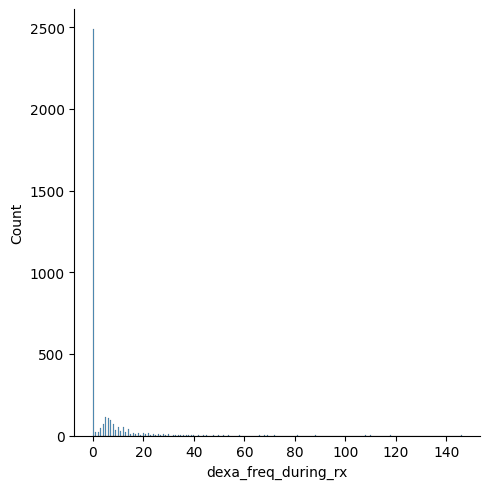

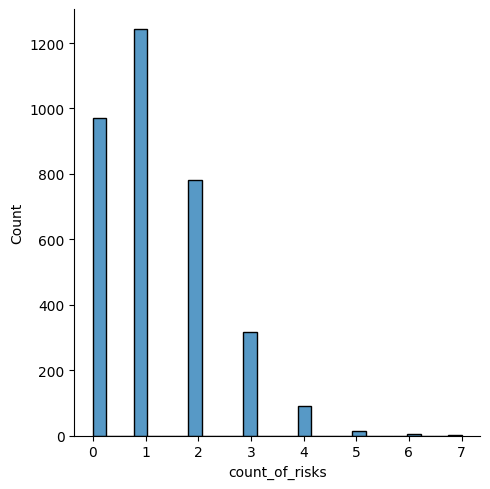

In [32]:
sns.displot(df["dexa_freq_during_rx"])
sns.displot(df["count_of_risks"])
;

In [21]:
df[['persistency_flag', 'gender_male', 'tscore_bucket_prior_ntm_>-2.5']].apply(pd.Series.value_counts)

,persistency_flag,gender_male,tscore_bucket_prior_ntm_>-2.5
0,2135,3230,1473
1,1289,194,1951


### Correlated with Persistency Flag

In [22]:
## Negative correlation
df.corr(numeric_only = True).persistency_flag.sort_values(ascending=True)[0:3]

risk_immobilization        -0.049787
risk_poor_health_frailty   -0.045277
risk_excessive_thinness    -0.040138
Name: persistency_flag, dtype: float64

In [23]:
## Positive correlation
df.corr(numeric_only = True).persistency_flag.sort_values(ascending=False)[1:4]

dexa_during_rx                           0.491823
comorb_long_term_current_drug_therapy    0.352760
dexa_freq_during_rx                      0.335235
Name: persistency_flag, dtype: float64

In [24]:
from sklearn.linear_model import Lasso

X = df.drop("persistency_flag", axis = 1).values
y = df["persistency_flag"].values

names = df.drop("persistency_flag", axis = 1).columns

lasso = Lasso (alpha=0.1)

lasso_coef = lasso.fit(X, y).coef_


ValueError: could not convert string to float: 'Caucasian'